This Project involves the usage of extracting, transforming & loading data (ETL, look at other documents). Within this python page, there is coding on creating graphs and analysing what each code is doing and giving an insight what each graph is showing in order to create proper busniess outcomes in how to further increase sales within Walmart. 



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd 
import seaborn as sns

In [2]:

df = pd.read_csv('CLEANED_DATASET_PYTHON.csv')



In [3]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)

In [4]:
# Summary statistics for numerical variables
summary_stats = df.describe()


In [5]:
summary_stats

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6114.000000,6.114000e+03,6114.000000,6114.000000,6114.000000,6114.000000,6114.000000
mean,22.033693,1.074193e+06,0.070167,60.597645,3.362599,171.702287,7.987978
std,12.449072,5.619102e+05,0.255449,18.461220,0.460100,39.354063,1.879465
min,1.000000,2.099862e+05,0.000000,-2.000000,2.470000,126.060000,3.879000
25%,11.000000,5.699644e+05,0.000000,47.000000,2.940000,132.110000,6.891000
50%,22.000000,9.885901e+05,0.000000,63.000000,3.450000,182.640000,7.872000
75%,33.000000,1.441538e+06,0.000000,75.000000,3.740000,213.080000,8.554000
max,45.000000,3.818686e+06,1.000000,100.000000,4.470000,227.230000,14.313000


In [6]:
# Convert date column to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')



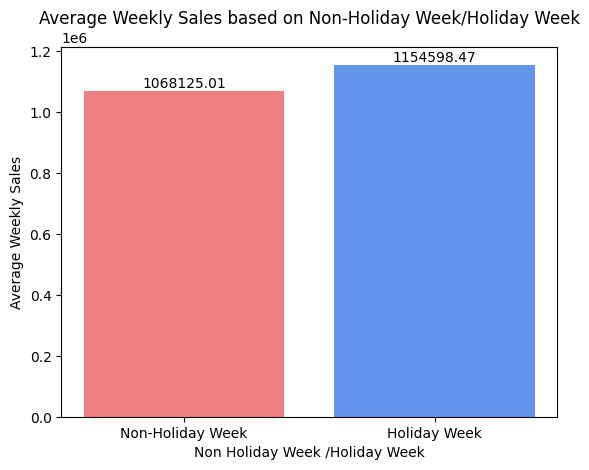

In [7]:

# Grouping by holiday_flag  and also calculating the average weekly sales
avg_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
#creating a seprate group of rows where holiday_flag column values are the same 
#After grouping, this selects the column 'Weekly_Sales' from each group. 
#the .mean will calculate the average weekly sales within each group

# Plotting the bar chart
bars = plt.bar(avg_sales.index, avg_sales.values, # avg_sales.index is looking for which contains the unique values of Holidat_Flag. so 0 & 1.
color=['lightcoral', 'cornflowerblue'])        #.values is looking for what contains the average weekly sales equal to each unique value in Holiday FLag
plt.xlabel('Non Holiday Week /Holiday Week')                    
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales based on Non-Holiday Week/Holiday Week')
plt.xticks([0, 1], ['Non-Holiday Week', 'Holiday Week']) # Changing the 0 & 1 to a readble format 

# Adding the value labels inside the bars
for bar in bars:  #Creating a loop over each bar in the 'bars' varible. 
    yval = bar.get_height()  # each bar inside the loop, this code gets the hieght of the bar 
                            # using get_height, and the height corresponds to the value of the bar. 
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
#the line above adds text to the plot at a specifc position.
#bar.get_x() + bar.get_width()/2 will calculate the x coordinate for placing the text label.
#bar.get_x() gets the x coordinate of the left edge of the bar and the bar.get_width() gets the width of bar
#adding the half of the width to the x coodinate centers the text label horizontally on the bar.
#Next the yval is for placing the text label which corresponds to the value of the bar 
# round(yval,2) rounds thevalue by 2 decimal place 
# ha='center', va='bottom' specify the horizontal and vertical alligment of the text. 
plt.show()




From the BAR CHART we can see that the Holiday week has a more average sale compared to the Non-Holiday, with a difference of 86473.46  This is likley due to the fact consumers are 
have free time during the Holiday compared to the Non-holiday week where they are working. 

In [8]:
1154598.47-1068125.01

86473.45999999996

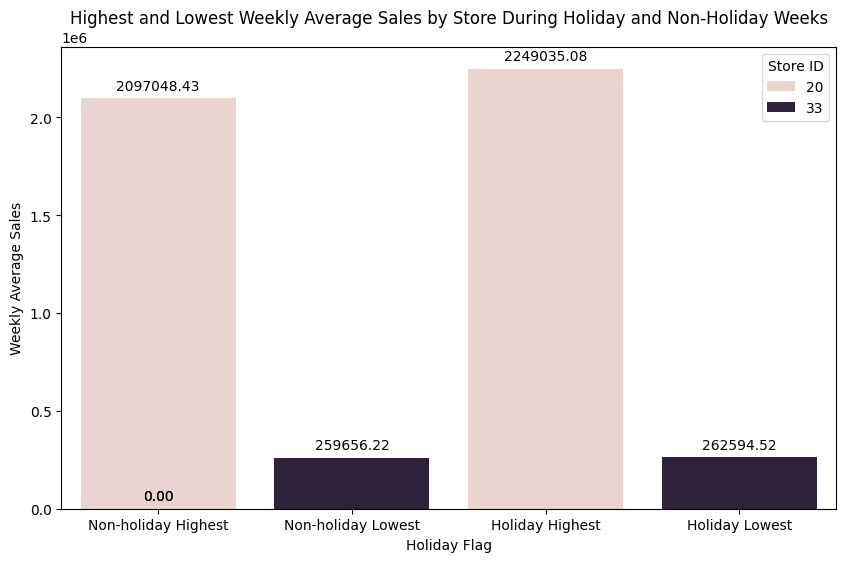

In [9]:

# Separating the data by holiday flag.
non_holiday_df = df[df['Holiday_Flag'] == 0]
holiday_df = df[df['Holiday_Flag'] == 1]

# By group by store allows us to put all the stores and sales within one coloumn and calculate the average weekly sales
non_holiday_sales = non_holiday_df.groupby('Store')['Weekly_Sales'].mean()
holiday_sales = holiday_df.groupby('Store')['Weekly_Sales'].mean()

# Identifying  the stores with the highest and lowest average sales in each category
highest_non_holiday_store = non_holiday_sales.idxmax()
lowest_non_holiday_store = non_holiday_sales.idxmin()
highest_holiday_store = holiday_sales.idxmax()
lowest_holiday_store = holiday_sales.idxmin()

# Create a summary DataFrame for plotting
summary = pd.DataFrame({
    'sales_type': ['Non-holiday Highest', 'Non-holiday Lowest', 'Holiday Highest', 'Holiday Lowest'],
    'Store': [highest_non_holiday_store, lowest_non_holiday_store, highest_holiday_store, lowest_holiday_store],
    'average_sales': [non_holiday_sales[highest_non_holiday_store], non_holiday_sales[lowest_non_holiday_store], 
                     holiday_sales[highest_holiday_store], holiday_sales[lowest_holiday_store]]
})  #What this does is that it creates a summaray of highest and lowest av weekly sales for both
    #non-holi and holi weeks. It is done to make it easier to plot as a graph. 

# Ploting the results in a barchart 
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=summary, x='sales_type', y='average_sales', hue='Store', dodge=False)
#ax is the varibale which is assigned to the store. sns.barplot is calling a barchart.
#hue adds a 3rd dimension to the plot by colouring the bars depending on the 'store' coloumn. 
#each store has a different colour making it easeir to find them. 
#dodge aligns the bars next to each other without any gaps. 
#adding an ax to it allows customization within the graphs such as annotations. 

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
#creating a for loop again iterates over each patch which reps each bar inside the plot. 
#height = p.get_height(), is getting its height whihc corresponds to the value being plotted on the y axis
#  ax.annotate(f'{height:.2f}', ...): This function adds the annotation text to the barchart. and it takes a number of parameters
# f'{height:.2f}' this formats the hight value and it will show it with 2 decimal places. 
# (p.get_x() + p.get_width() / 2., height) gets the coorinates where the annoation will be put 
# it is calculated as the center of the barhcart (p.get_x() + p.get_width() / 2.) horizontally and at the same height as the top of the bar vertically.
# ha='center', va='center': These parameters set the horizontal and vertical alignment of the annotation text to the center.
#xytext=(0, 9): This specifies the offset from the annotation point (in this case, the center of the bar). 
#It moves the annotation 0 units horizontally and 9 units vertically.
#textcoords='offset points': This parameter specifies that the xytext coordinates are given in points offset 
#from the annotation point.
plt.title('Highest and Lowest Weekly Average Sales by Store During Holiday and Non-Holiday Weeks')
plt.ylabel('Weekly Average Sales')
plt.xlabel('Holiday Flag')
plt.legend(title='Store ID')
plt.show()


In [10]:
H = 2249035.08
NH = 2097048.43
difference = H - NH
print('Difference of Holiday - Non-holiday: %.2f' % difference)

LH = 2249035.08
LNH = 2097048.43
difference = LH - LNH
print('Lowest Difference of Holiday - Non-holiday: %.2f' % difference)


Difference of Holiday - Non-holiday: 151986.65
Lowest Difference of Holiday - Non-holiday: 151986.65


Viewing this graph gives an understanding of the highest * lowest average sales during non holiday weeks and holiday weeks. There is a clear indicator that during the holiday week there is a difference of 151,986.65, compared to the non- holidat highest. This shows that during holiday week that there is more average weekly sales duringt this period. To further add during the non holiday period the lowest average sales there is 259,656.22 while during the holiday period there is average sale of 262,594.52. Possible ways for Walmart to make similar sales during Non holiday week is possibly implent discounts for loyal customers, or give out better offers such buy 3 for the price of $5 etc.  

In [11]:

# locating the store with the lowest unemployment rate by using the .loc code. Using the idxmin is locating the index row with the lowest value wthin 
lowest_unemployment_store = df.loc[df['Unemployment'].idxmin()]['Store']       # Unemployment and retrieves the info from the store coloumn 
                                                                            
# Find the store with the highest unemployment rate
highest_unemployment_store = df.loc[df['Unemployment'].idxmax()]['Store']      #the same rule applies here however it is locating for the max value. 

print("Store with the lowest unemployment rate:", lowest_unemployment_store)   # Printing which store has values with max and min 
print("Store with the highest unemployment rate:", highest_unemployment_store)


Store with the lowest unemployment rate: 4
Store with the highest unemployment rate: 12


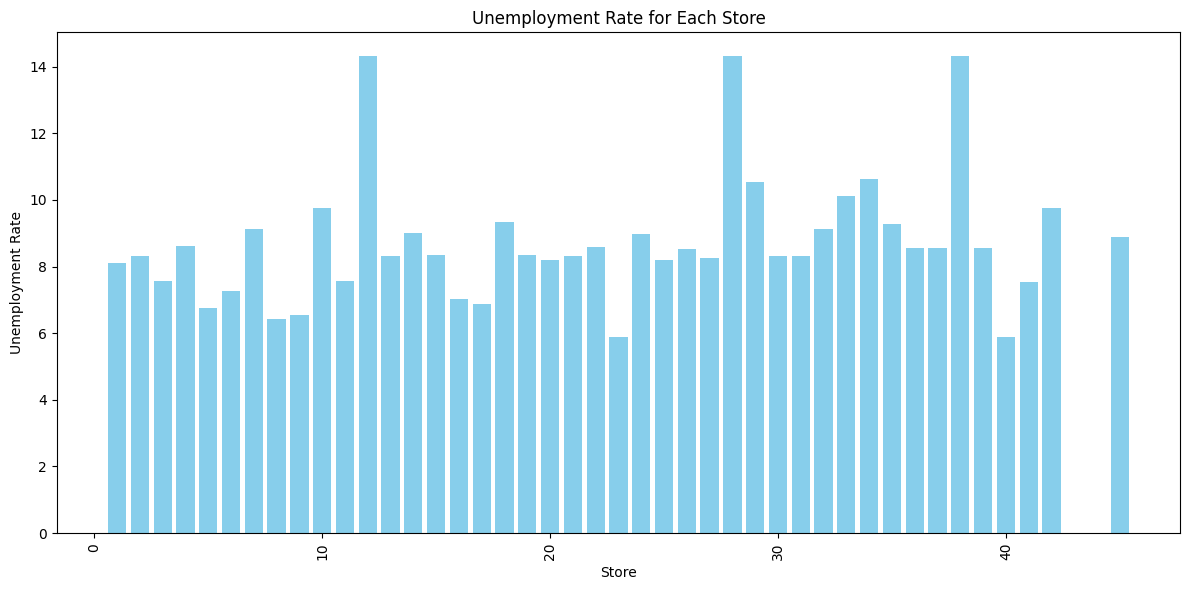

In [12]:

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Store'], df['Unemployment'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate for Each Store')
plt.xticks(rotation=90)
plt.tight_layout()  # Allowing user readability to be more easier and look more professional 
plt.show()


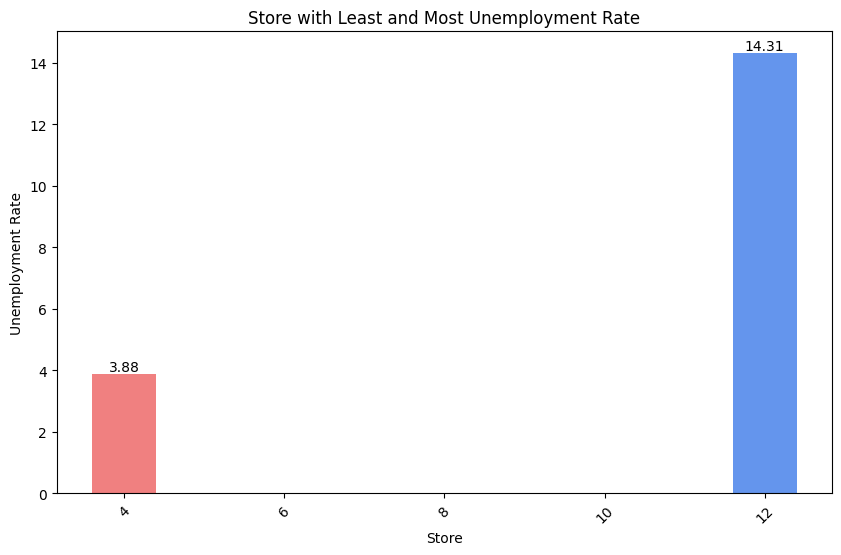

In [13]:


# Finding the store with the lowest unemployment rate
lowest_unemployment_store = df.loc[df['Unemployment'].idxmin()]      #The same code used here as previously
# Finding the store with the highest unemployment rate
highest_unemployment_store = df.loc[df['Unemployment'].idxmax()]

# Createing  a New DataFrame with the lowest and highest unemployment stores 
summary_data = pd.DataFrame({ # Dictionary has keys which shows coloumn names of the df & lists which represents the data for each coloumn.  
    'Store': [lowest_unemployment_store['Store'], highest_unemployment_store['Store']],
    'Unemployment': [lowest_unemployment_store['Unemployment'], highest_unemployment_store['Unemployment']]
})  # using the previous code we have obtained the max and min and inserted within the new function called summary_data. 
    # This new data frame will be used to create the new graph only containing the max and min. 
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_data['Store'], summary_data['Unemployment'], color=['lightcoral', 'cornflowerblue'])
plt.xlabel('Store')
plt.ylabel('Unemployment Rate')
plt.title('Store with Least and Most Unemployment Rate')
plt.xticks(rotation=45)

# Inputting values inside the bars for a better readability. 
for bar, value in zip(bars, summary_data['Unemployment']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
             ha='center', va='bottom')
# creating a loop which goes through each bar in the bar chart. and is corresponding to the summarary_date. 
# zip function is done so it can iterate over pairs from bars and summary_data['Unemployment']).
plt.show()

In [14]:
14.31- 3.88 # Caluclating the differnce of max and min 



10.43

Can see a visual representation of which store has the highest unemployment and which does not, with a difference of 10.43. This is very significant. 
Likely reasons as to what factors that can impact unemployment rate can depends on economic conditions and other external factors. 
Economic growth/ recession where business is more likely to expand and hire new employees, which leads to a lower unemployment rate. In contrast during recessions business can make employees redundant and not employ anyone and have higher unemployment rates.

Another factor could be due to demographical factors, in certain areas example the store 12 possibly could have an increase in population growth which essentially means less need for employment. Whereas an area with a lower population will require more in demand of employment hence the reasoning as to why possibly, store 4 has the lowest rate of unemployment. 



Maybe find out if there is more unemployment during non holiday week or if there is less unemployment during holiday week ?

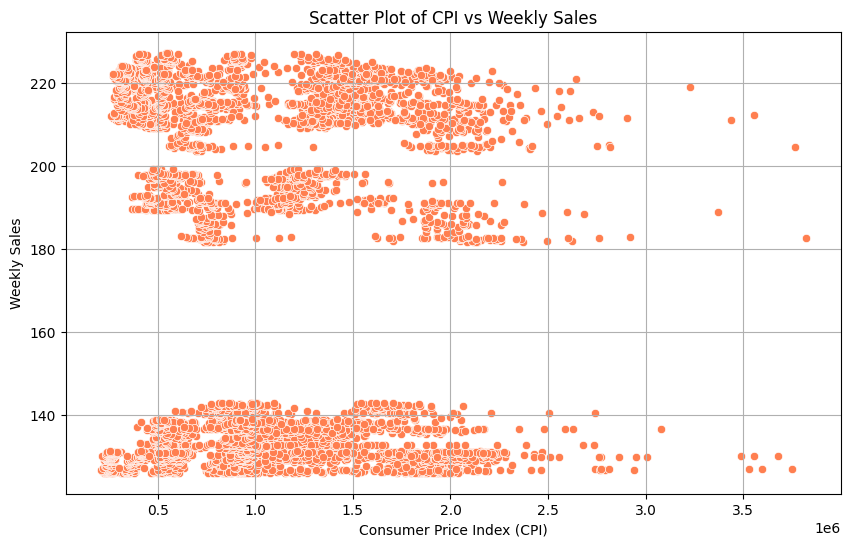

In [15]:


# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weekly_Sales', y='CPI', color='coral')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of CPI vs Weekly Sales')
plt.grid(True)
plt.show()


A clear indicator that as CPI increases the amount of weekly sale also increases. What can also be told here is that there are no weekly sales from approximately 160-180, the exact reason to this is unknown. 

From 0.5- 2.0CPI there is a lot of sales as there are plots all clustered together indicating that within this CPI range consumers will buy more products due to the increase in weekly sales. 

CPIs after 3.5 we can see about 6 sales going forth which indicates that there are not many sales and that inflation does in fact have an impact on sales. 
One possible way to reduce CPI for better sales, is lowering the prices of Walmart products. This can be done through sales, discounts, promotions, or simply by reducing the regular prices of items. Lower prices lead to a decrease in the overall cost of living for consumers, contributing to a reduction in the CPI, however there is a risk that sales store profit can also be decreased.





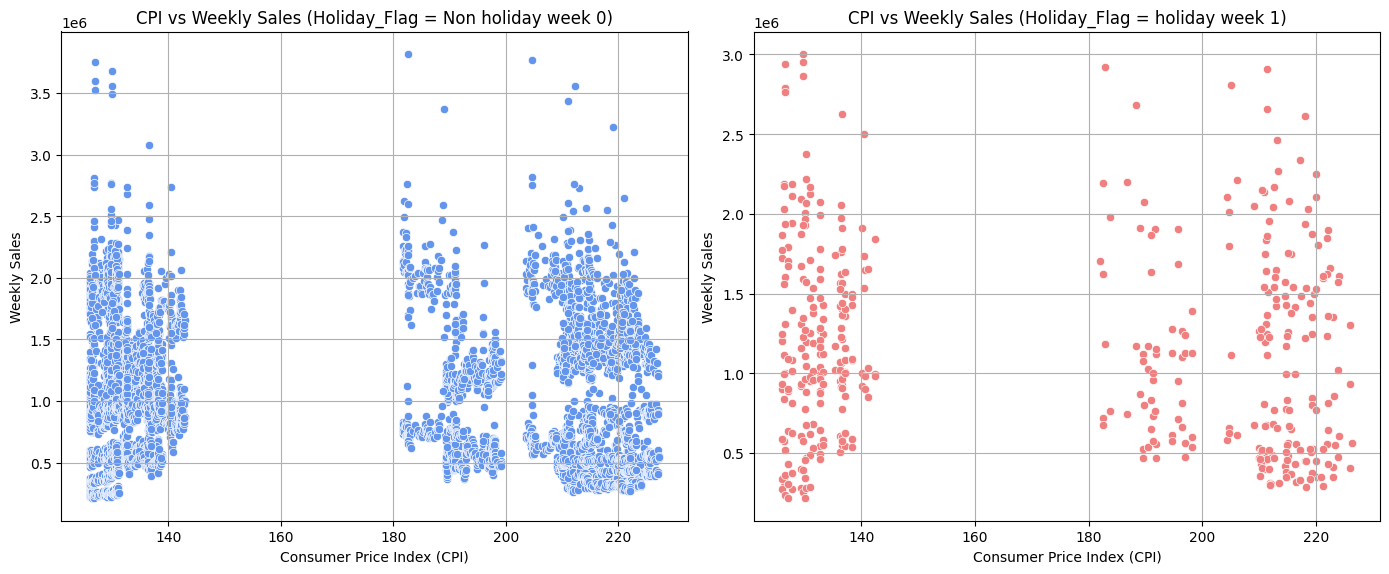

In [16]:


# Plotting scatter plots for Holiday Flag = 0 and Holiday Flag = 1
plt.figure(figsize=(14, 6))

# Scatter plot for Holiday Flag = 0
plt.subplot(1, 2, 1)  #This is creating a subplot so we can add to scatterplot graphs next to each other and compare
#the parameter 1,2,1 creates teh first subplot in a grid with 1 row and 2 coloums. 
sns.scatterplot(data=df[df['Holiday_Flag'] == 0.0], x='CPI', y='Weekly_Sales', color='cornflowerblue') #creates the scatter plot using seaborn. 
plt.xlabel('Consumer Price Index (CPI)')                                        # Specifying it to make the scatter plot with only Holiday_flag 0.0
plt.ylabel('Weekly Sales')
plt.title('CPI vs Weekly Sales (Holiday_Flag = Non holiday week 0)')    
plt.grid(True)

# Scatter plot for Holiday Flag = 1
plt.subplot(1, 2, 2)  #creating the 2nd scatter graph next to the 1st. 
sns.scatterplot(data=df[df['Holiday_Flag'] == 1.0], x='CPI', y='Weekly_Sales', color='lightcoral')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Weekly Sales')
plt.title('CPI vs Weekly Sales (Holiday_Flag = holiday week 1)')
plt.grid(True)

plt.tight_layout()
plt.show()


Comparing the 2 graphs there is a clear pattern where there is more expenditure during the Non holiday week. Possible reasons to this are customers have a routine shopping behaviour. consumers tend to follow their normal shopping routine such as purchasing groceries, household essentials and other necessities from Walmart. 
    Another is that there is a lower competition, consumers may tend to spend a larger amount of their income to more of one-time purchases of holiday gifts where it tends to get more expensive during the holiday weeks. This results to consumers spending more during non-holiday weeks. (This is just one of many reasonings). To add on these graphs shows what tends to happen as CPI decreases and increases during the non holiday week and holiday week.


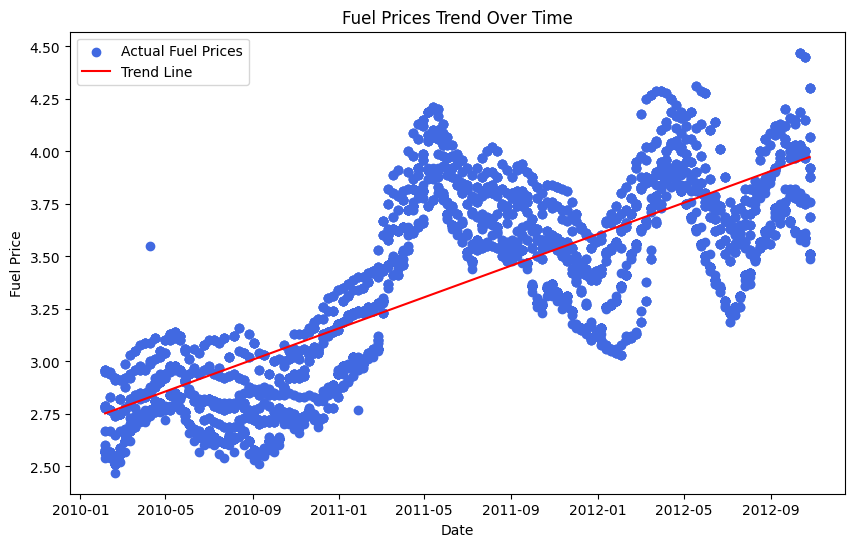

In [17]:
from sklearn.linear_model import LinearRegression


# Converting date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Over here I am extracting numerical representation of dates for regression
# Converting dates to Unix timestamps (for tracking time as a running total of seconds)
X = (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

X = X.values.reshape(-1, 1) 
y = df['Fuel_Price'].values.reshape(-1, 1)
 #Used to change the shape dimensions of an array without changing its data. 
#It allows you to convert an array from one shape to another, as long as the total number of elements remains the same.
# Fit linear regression model

model = LinearRegression().fit(X, y)

# obtaining predictions
predictions = model.predict(X)

# Plotting the values and how big the graph should be 
plt.figure(figsize=(10, 6))

#Inputting the original data with colours enbaled and title
plt.scatter(df['Date'], df['Fuel_Price'], color='royalblue', label='Actual Fuel Prices')

# placing the trend line
plt.plot(df['Date'], predictions, color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Fuel Prices Trend Over Time')
plt.legend()


Comparing the fuel prices over time we can see that the fuel prices in fact do increase. There are multiple fluctuations within the 2 years however the general trend is that there is an increase in fuel price. This is also shown by viewing the trendline. 

Likely reasons to this are as time goes on oil prices increases globally, which essentially means that to buy oil cost a lot more, and this means that consumers need to spend more on fuel. Reasons like recession, global economy all play a factor as to why their fuel price increases.


Likely reasons as to why fuel is involved within this data set is, due to the operational expenses. Fuel expenses could be a significant operational cost for Walmart, espically for the transportation and logistics. Including the Fuel prices within this dataset allows Walmart to get analysis of the impact in fluctuations in fuel prices and how it will affect its operation expenses and profit. 

Another possible reason is that consumer may tend to shop less frequently when shopping via vehicle due to the reasoning in saving petrol cost. Walmart can analyse fuel prices to check for how much of a decrease in shopping due to fuel prices on the rise.


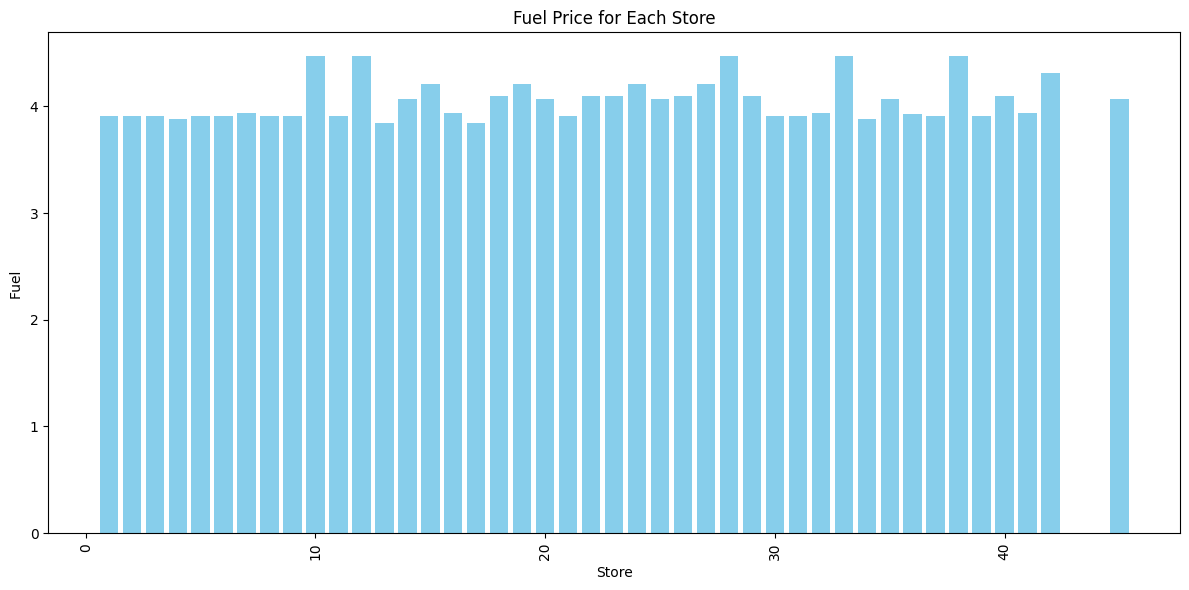

In [28]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Store'], df['Fuel_Price'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Fuel ')
plt.title('Fuel Price for Each Store')
plt.xticks(rotation=90)
plt.tight_layout()  # Allowing user readability to be more easier and look more professional 
plt.show()


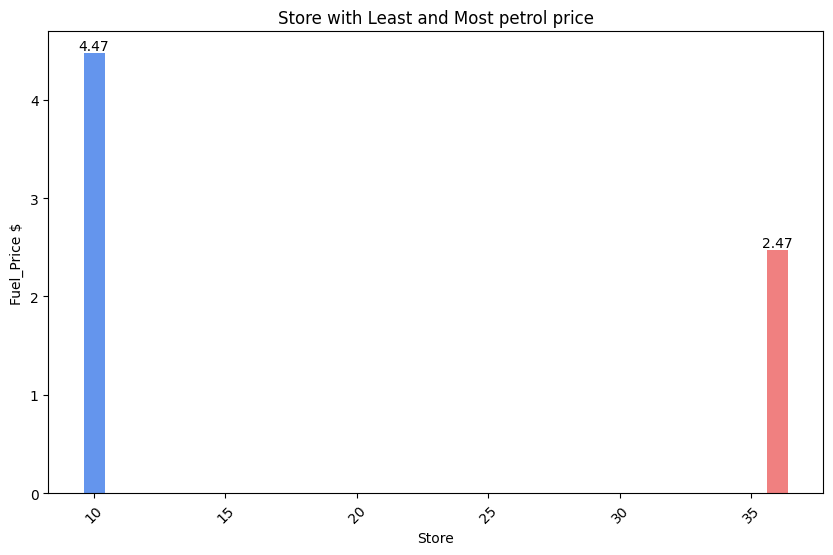

In [29]:

# Finding the store with the lowest unemployment rate
lowest_unemployment_store = df.loc[df['Fuel_Price'].idxmin()]      #The same code used here as previously
# Finding the store with the highest unemployment rate
highest_unemployment_store = df.loc[df['Fuel_Price'].idxmax()]

# Createing  a New DataFrame with the lowest and highest unemployment stores 
summary_data = pd.DataFrame({ # Dictionary has keys which shows coloumn names of the df & lists which represents the data for each coloumn.  
    'Store': [lowest_unemployment_store['Store'], highest_unemployment_store['Store']],
    'Fuel_Price': [lowest_unemployment_store['Fuel_Price'], highest_unemployment_store['Fuel_Price']]
})  # using the previous code we have obtained the max and min and inserted within the new function called summary_data. 
    # This new data frame will be used to create the new graph only containing the max and min. 
# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(summary_data['Store'], summary_data['Fuel_Price'], color=['lightcoral', 'cornflowerblue'])
plt.xlabel('Store')
plt.ylabel('Fuel_Price $')
plt.title('Store with Least and Most petrol price')
plt.xticks(rotation=45)

# Inputting values inside the bars for a better readability. 
for bar, value in zip(bars, summary_data['Fuel_Price']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
             ha='center', va='bottom')
    plt.show

In [20]:

# locating the store with the lowest fuel rate.
lowest_fuel_price = df.loc[df['Fuel_Price'].idxmin()]['Store']       
                                                                            
# Find the store with the highest unemployment rate
highest_fuel_price = df.loc[df['Fuel_Price'].idxmax()]['Store']      #the same rule applies here however it is locating for the max value. 

print("Store with the lowest fuel price:", lowest_fuel_price)   # Printing which store has values with max and min 
print("Store with the highest fuel pirce:", highest_fuel_price)

Store with the lowest fuel price: 36
Store with the highest fuel pirce: 10


Viewing the bar chart, it is clear that store 10 has highest fuel price and store 36 has the lowest fuel price. 

In [21]:


# Filtering the data for store 10
store_10_sales = df[df['Store'] == 10]['Weekly_Sales']

# Filtering the data for store 36
store_36_sales = df[df['Store'] == 36]['Weekly_Sales']

# Calculating the average sales
avg_sales_store_10 = store_10_sales.mean()
avg_sales_store_36 = store_36_sales.mean()

# Printing the results
print(f'Average weekly sales for store 10: {avg_sales_store_10}')
print(f'Average weekly sales for store 36: {avg_sales_store_36}')


Average weekly sales for store 10: 1899424.5726573425
Average weekly sales for store 36: 373511.9927972028


In [22]:
# Average weekly sales for store 10 and store 36
avg_store_10 = 1899424.5726573425
avg_store_36 = 373511.9927972028

# This is determining which is bigger by using 'if' statments which will ensure 
# that you are correct 
if avg_store_10 > avg_store_36:
    print("Store 10 has the larger average weekly sales.")
elif avg_store_10 < avg_store_36:
    print("Store 36 has the larger average weekly sales.")
else:
    print("Both stores have the same average weekly sales.")


Store 10 has the larger average weekly sales.


We can see that store 10 that one with the highest avg fuel price has a higher average weekly sale. Indicates that more customers may shop within store 10 more regular,Reasons to this is possibly Store 10 might be located in an area with higher average incomes, where customers are less sensitive to fuel prices and more willing to spend on other products.

Furthermore Store 10 could be larger with a wider assortment of goods and services, attracting more customers and higher sales.
Product Availability: Store 10 could have better stock levels or more exclusive products that draw in more shoppers. These are just one of many.

Ways that store 36 could improve sales is enchance Customer Experience by Improving customer service, store layout, and shopping experience to attract more customers.
Increase Assortment and Stock Levels, ensureing a wide variety of products and better stock availability.
Marketing Strategies, by  investing in targeted marketing campaigns to increase visibility and attract more customers.
Implementing these ideas can highly effect customer engagment towrads this store, and gaina better overal weekly average sales. 

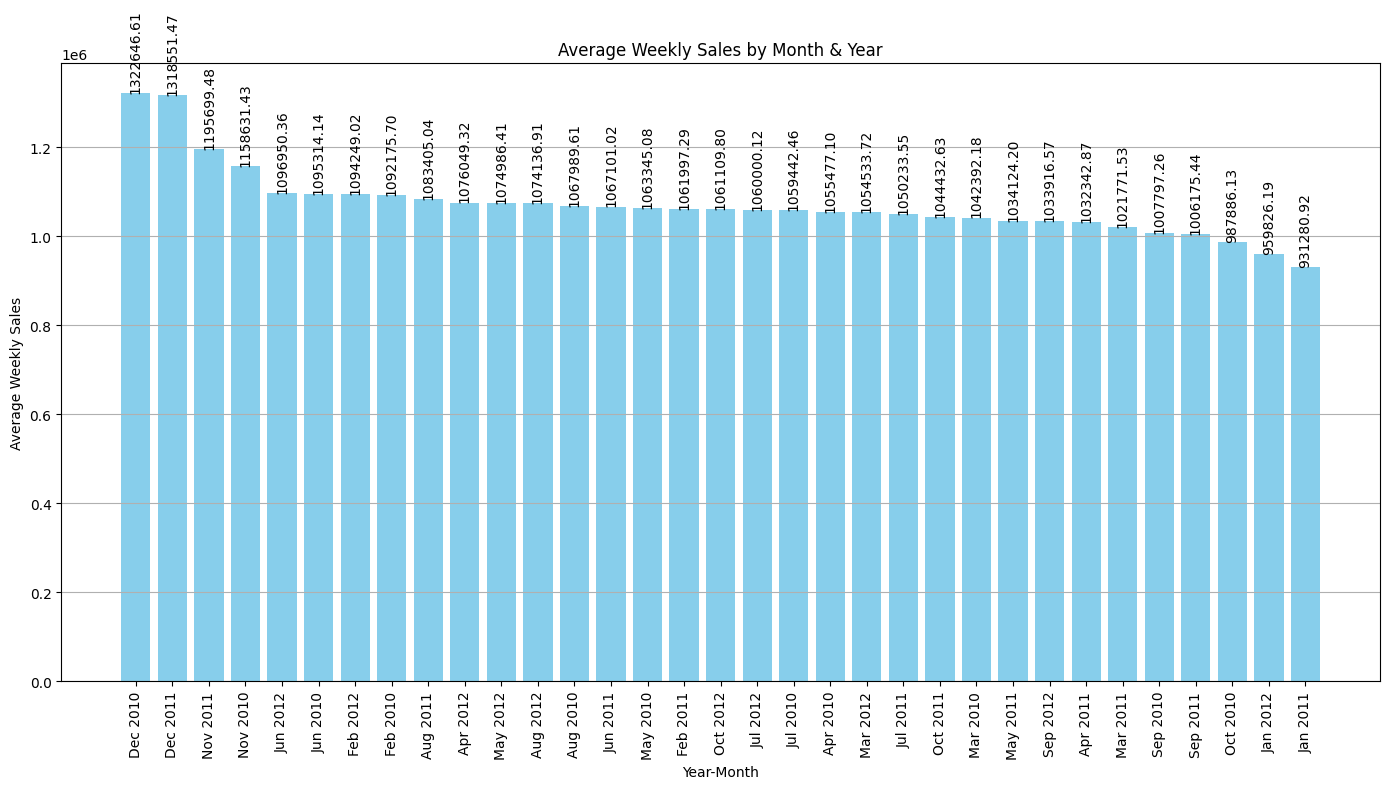

In [23]:


# Converting the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter the data for the specified date range
filtered_df = df[(df['Date'] >= '2010-01-05') & (df['Date'] <= '2012-10-26')]

# Extracting the year and month from the 'Date' column   # Doing this makes it easier for analysis and easier to group.
filtered_df['YearMonth'] = filtered_df['Date'].dt.to_period('M')  
#This is done so the date coloumn is filtered to a new df coloumn called 
# YearMonth which shows just the years and month not date..
#filtered_df['Date'].dt.to_period('M') is what extracts the year and month from each date in the date coloumn
# & converts it to a period object which shows the specfic month. 
# dt.to_period('M') function is used to convert the dates to a monthly period frequency.

# Grouping by the 'YearMonth' and calculate the average weekly sales
monthly_sales = filtered_df.groupby('YearMonth')['Weekly_Sales'].mean().reset_index()
# filtered_df.groupby('YearMonth') This part of the code groups the filtered_df DataFrame by the YearMonth column. 
#Grouping by YearMonth means that all data points that belong to the same month are aggregated together.
#Once grouped the ['Weekly_Sales'].mean() calculates the mean of the sales for each group. with an outcome of average weekly sales for each month
#.reset_index(): After the groupby and mean operations, the resulting object is a DataFrame with YearMonth as the index. 
# reset_index() is used to convert the index back into a column, making it easier to manipulate and plot.

# Sorting the monthly_sales DataFrame by 'Weekly_Sales'
monthly_sales_sorted = monthly_sales.sort_values(by='Weekly_Sales', ascending=False)
#This part of the code will sort the monthly_sales df by the weekly_sales coumn in a descending order. 
# The by='Weekly_Sales' ensures that the sorting should be done based on the weekly_sales column and 
#False makes it to a descending order from highest and lowest.(easier to visualize)

# Convert 'YearMonth' to a more readable format, Jan 2010" instead of 2010-01
monthly_sales_sorted['YearMonthStr'] = monthly_sales_sorted['YearMonth'].dt.strftime('%b %Y')
#done to convert the month and date to an abbreviated month and full year format. 
# monthly_sales_sorted['YearMonth'] selects the yearmonth coloumn from the monthly_sales_sorted df.
# .dt, This is a pandas accessor used for datetime-like properties. It allows us to access various datetime properties and methods for the values in the YearMonth column. 
# .strftime('%b %Y'), The strftime method is done so it can convert teh datetime like obejects to strings following the format given
#the format is '%b %Y'. where %b is the abbreviated month name, "Jan", "Feb" &
# %Y is the Full year "2010", "2011"
# monthly_sales_sorted['YearMonthStr'], is created to add a new column in the monthly_sales_sorted DataFrame called 
# YearMonthStr and assigns the formatted strings to this column.


# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(monthly_sales_sorted['YearMonthStr'], monthly_sales_sorted['Weekly_Sales'], color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month & Year')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Annotate the bars with the average sales values
for index, value in enumerate(monthly_sales_sorted['Weekly_Sales']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()


Viewing this graph there is a clear indicator that depending on the month there is more average sales. Looking at the 2 years in December there is the highest sales, while during January the 2 years have the lowest average sales. The possible reasons to this is likely due to Christmas starting from December, which has the most discounts, most offers, and most gifts are bought during this time of the month. This is a great month for Walmart during its sales as it makes the greatest number of sales. However, during the Jan period there is the lowest number of sales. The reasons to this are during this time of the month holidays are over and it is no longer Christmas times so less offers are given out and less gifts are bought for one another. To add on due to the December month being taken over with a high number of purchases, customers will tend to start saving again in order for the next purchases during summer which is actually the 3rd most sales, this is likely done as summer holiday is during this time and purchases are bought a lot.

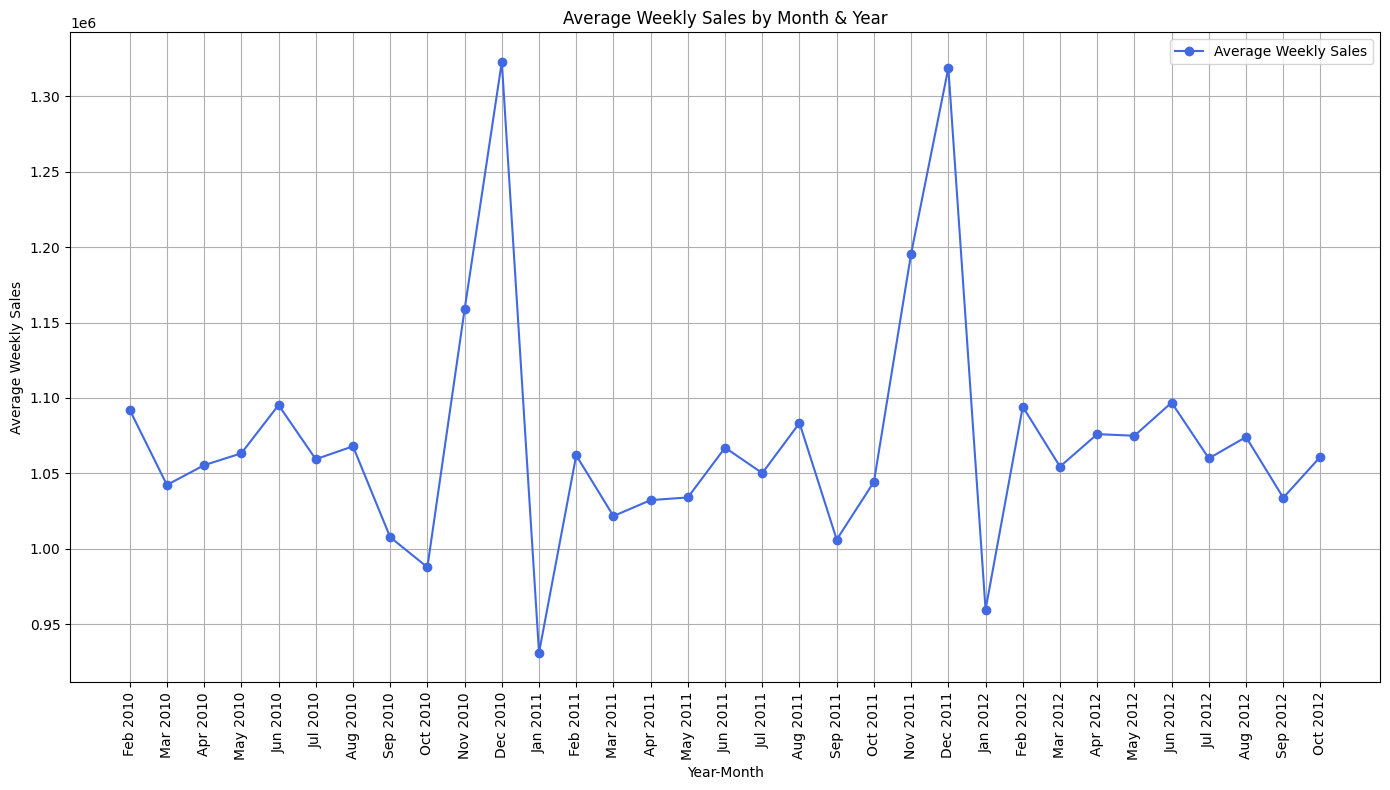

In [25]:

# Converting the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filtering the data for my df
filtered_df = df[(df['Date'] >= '2010-02-05') & (df['Date'] <= '2012-10-26')]


# Extract year and month from the 'Date' column
filtered_df['YearMonth'] = filtered_df['Date'].dt.to_period('M')
#Filtering the data, I am aggregating  the data on a monthly basis. hence I have extracted the year & month info only from the date coloumn
#dt.to_period('M') method. 
# This converts each date into a Period object representing the corresponding year and month.

# Grouping by the 'YearMonth' and calculating the average weekly sales
monthly_sales = filtered_df.groupby('YearMonth')['Weekly_Sales'].mean().reset_index()
#Same as above coding for bar chart


# Converting 'YearMonth' to a more readable format from 2010-10 to Jan 2010
monthly_sales['YearMonthStr'] = monthly_sales['YearMonth'].dt.strftime('%b %Y')
#look above to explain each codes. 

# Plot the results
plt.figure(figsize=(14, 8))

# Line plot for average weekly sales
plt.plot(monthly_sales['YearMonthStr'], monthly_sales['Weekly_Sales'], 
marker='o', linestyle='-', color='royalblue', label='Average Weekly Sales')


# Formatting the plot
plt.xlabel('Year-Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month & Year')
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()


plt.tight_layout()


plt.show()


This line graph is the same as the bar chart above showing the average weekly sales however it is showing how sales differ from each month through the 2 years presented within the data. It makes it easier visualise which months had the most sales, and which had the least, and can also visualise the trends and drops throughout the year. What can also be mentioned is that there is a clear pattern, during months Feb-Aug on all 3 years there is very similar sales/trend, and same applies for the 2 months in december and the 2 months in January. 

A challenge which I have been challenged with while doing this project is making certain graphs only show the required bar chart for example on line 13 and 29 showcasing the graphs on "Store with Least and Most Unemployment Rate" & "Store with Least and Most petrol price", is showing the whole graph and there are gaps present with bar chart present, this makes the bar chart look unprofessional. How I tried to fix this is by doing research and asking superiors within my skills city bootcamp however due to unforeseen circumstances it was rather difficult to fix this issue and as a result i have had to keep the graphs as present.

In [26]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0.0,42.0,2.57,211.10,8.106
1,1,2010-02-12,1641957.44,1.0,39.0,2.55,211.24,8.106
2,1,2010-02-19,1611968.17,0.0,40.0,2.51,211.29,8.106
3,1,2010-02-26,1409727.59,0.0,47.0,2.56,211.32,8.106
4,1,2010-03-05,1554806.68,0.0,46.0,2.62,211.35,8.106
5,1,2010-03-12,1439541.59,0.0,58.0,2.67,211.38,8.106
6,1,2010-03-19,1472515.79,0.0,55.0,2.72,211.22,8.106
7,1,2010-03-26,1404429.92,0.0,51.0,2.73,211.02,8.106
8,1,2010-04-02,1594968.28,0.0,62.0,2.72,210.82,7.808
9,1,2010-04-09,1545418.53,0.0,66.0,2.77,210.62,7.808
